# Regression With Pytorch

## Linear Regression

In this section, we'll set up our environment and prepare the data for our linear regression model. We'll start by importing the necessary libraries, checking for GPU availability, and then create a simple dataset for our single-variable linear regression problem. Finally, we'll set up a DataLoader to efficiently feed data to our model during training.

In [1]:
# Import the required libraries (PyTorch, NumPy, and Matplotlib)
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Check if GPU is available and set the device accordingly
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Generate a simple dataset for linear regression
# Use numpy to generate x values, and create y values using y = 2x + 1 + some noise
np.random.seed(42)
x = np.random.rand(100, 1)
y = 2*x + 1 + 0.1*np.random.randn(100, 1)

# Convert the numpy arrays to PyTorch tensors
x_tensor = torch.from_numpy(x).float().to(device)
y_tensor = torch.from_numpy(y).float().to(device)

# Create a TensorDataset
dataset = TensorDataset(x_tensor, y_tensor)

# Create a DataLoader with batch_size=32
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In this section, we'll define our linear regression model using PyTorch. For a single-variable linear regression, we need a model that represents the equation y = mx + b, where m is the slope and b is the y-intercept. We'll use PyTorch's nn.Module as the base class for our model.


In [2]:
# Define a LinearRegression class that inherits from nn.Module
# The class should have:
# - An __init__ method that initializes the linear layer
# - A forward method that performs the forward pass

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        # Initialize the linear layer here
        # Use nn.Linear for a single input feature and single output
        self.linear = nn.Linear(1, 1).to(device)

    def forward(self, x):
        # Implement the forward pass
        # This should be a simple one-line function
        return self.linear(x)

# Instantiate the model and move it to the appropriate device
model = LinearRegression().to(device)

In this section, we'll define the loss function and optimizer for our linear regression model. The loss function measures how well our model is performing, while the optimizer adjusts the model's parameters to minimize this loss. For linear regression, we typically use Mean Squared Error (MSE) as the loss function and Stochastic Gradient Descent (SGD) or its variants as the optimizer.


In [3]:
# Define the loss function
# Use an appropriate loss function for regression from torch.nn
loss_fn = nn.MSELoss()

# Define the optimizer
# Use an optimizer from torch.optim
# Use a learning rate of 0.01
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Print out the model's parameters
print(model.parameters)

<bound method Module.parameters of LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)>


In this section, we'll implement the training loop for our linear regression model. The training loop iterates over our dataset multiple times (epochs), and for each batch of data, it performs a forward pass, calculates the loss, performs backpropagation, and updates the model parameters. We'll also track and print the loss for each epoch to monitor the training progress.


In [4]:
# Set the number of epochs
num_epochs = 300

# Implement the training loop
# For each epoch:
#   For each batch in the dataloader:
#     1. Zero the gradients
#     2. Perform forward pass
#     3. Compute the loss
#     4. Perform backward pass
#     5. Update the parameters
#   Print the average loss for the epoch

for epoch in range(num_epochs):
    for batch in dataloader:
        x_batch, y_batch = batch
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/300, Loss: 3.186492681503296
Epoch 2/300, Loss: 2.724358320236206
Epoch 3/300, Loss: 1.6647981405258179
Epoch 4/300, Loss: 2.082002878189087
Epoch 5/300, Loss: 2.9348630905151367
Epoch 6/300, Loss: 1.179513692855835
Epoch 7/300, Loss: 1.1844650506973267
Epoch 8/300, Loss: 1.7170718908309937
Epoch 9/300, Loss: 0.7318800091743469
Epoch 10/300, Loss: 0.8901736736297607
Epoch 11/300, Loss: 2.062645196914673
Epoch 12/300, Loss: 0.6360357999801636
Epoch 13/300, Loss: 0.8630254864692688
Epoch 14/300, Loss: 0.4885184168815613
Epoch 15/300, Loss: 1.155561089515686
Epoch 16/300, Loss: 1.3098130226135254
Epoch 17/300, Loss: 0.34980735182762146
Epoch 18/300, Loss: 0.9064235687255859
Epoch 19/300, Loss: 0.7694226503372192
Epoch 20/300, Loss: 0.667295515537262
Epoch 21/300, Loss: 0.27680426836013794
Epoch 22/300, Loss: 0.10757823288440704
Epoch 23/300, Loss: 0.35772955417633057
Epoch 24/300, Loss: 0.40897464752197266
Epoch 25/300, Loss: 0.09642712026834488
Epoch 26/300, Loss: 0.3069939017295

In this final section, we'll evaluate our trained model and visualize its performance. We'll use the model to make predictions on the entire dataset, calculate the Mean Squared Error (MSE) as an evaluation metric, and create a scatter plot showing the original data points and the model's predictions.


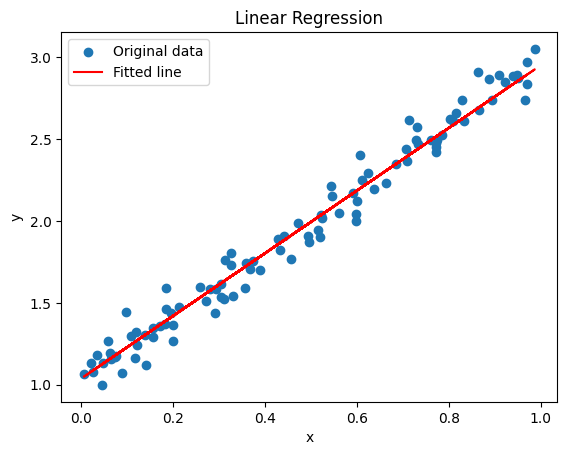

Learned parameters:
Slope: 1.913743495941162
Intercept: 1.038156270980835
Mean Squared Error: 0.008213244378566742


In [5]:
# Set the model to evaluation mode
model.eval()

# Generate predictions for the entire dataset
# Use torch.no_grad() to disable gradient calculation
with torch.no_grad():
    y_pred = model(x_tensor)

# Calculate the Mean Squared Error (MSE) between predictions and true values
mse = loss_fn(y_pred, y_tensor)

# Create a scatter plot
# - Plot the original data points
# - Plot the model's predictions
# - Add a title, legend, and axis labels
plt.scatter(x, y, label='Original data')
plt.plot(x, y_pred.cpu().numpy(), label='Fitted line', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Print the model's learned parameters (slope and intercept)
# These can be extracted from the model's linear layer
print('Learned parameters:')
print('Slope:', model.linear.weight.item())
print('Intercept:', model.linear.bias.item())
print('Mean Squared Error:', mse.item())

## Multiple Linear Regression

Develop a multiple linear regression model to predict house prices based on three features: square footage, number of bedrooms, and age of the house. Use PyTorch to implement this model. Your task is to generate a synthetic dataset, create and train the model, and evaluate its performance.

Key requirements:
- Generate a synthetic dataset with 1000 samples
- Implement a multiple linear regression model using PyTorch
- Train the model for an appropriate number of epochs
- Evaluate the model's performance using Mean Squared Error and R-squared score
- Visualize the model's predictions against one of the features (your choice)

Epoch 1/997, Loss: 202513872.0
Epoch 2/997, Loss: 97332400.0
Epoch 3/997, Loss: 45653232.0
Epoch 4/997, Loss: 123513752.0
Epoch 5/997, Loss: 168578640.0
Epoch 6/997, Loss: 114828624.0
Epoch 7/997, Loss: 185506512.0
Epoch 8/997, Loss: 110492992.0
Epoch 9/997, Loss: 134738640.0
Epoch 10/997, Loss: 138542848.0
Epoch 11/997, Loss: 81605584.0
Epoch 12/997, Loss: 103011712.0
Epoch 13/997, Loss: 133964512.0
Epoch 14/997, Loss: 148451120.0
Epoch 15/997, Loss: 87709088.0
Epoch 16/997, Loss: 136252624.0
Epoch 17/997, Loss: 89613768.0
Epoch 18/997, Loss: 151415408.0
Epoch 19/997, Loss: 69070816.0
Epoch 20/997, Loss: 123899352.0
Epoch 21/997, Loss: 38020132.0
Epoch 22/997, Loss: 79042016.0
Epoch 23/997, Loss: 127288992.0
Epoch 24/997, Loss: 90159216.0
Epoch 25/997, Loss: 172669168.0
Epoch 26/997, Loss: 178201152.0
Epoch 27/997, Loss: 96862264.0
Epoch 28/997, Loss: 103527600.0
Epoch 29/997, Loss: 74698064.0
Epoch 30/997, Loss: 94797376.0
Epoch 31/997, Loss: 118917256.0
Epoch 32/997, Loss: 111914256

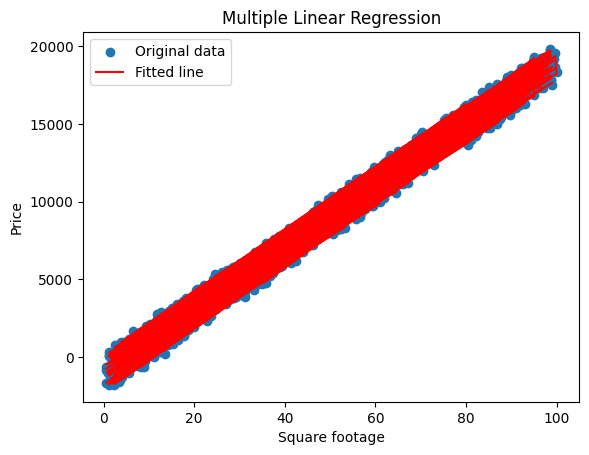

Learned parameters:
Slope (sqft): 199.89918518066406
Slope (bedrooms): 58.01311111450195
Slope (age): -50.12477111816406
Intercept: 38.71274948120117
Mean Squared Error: 12242.21875
R-squared: 0.9996476769447327


In [6]:
# Implement a multiple linear regression model to predict house pricesbased on three features: square footage, number of bedrooms, and age of the house. Use PyTorch to implement this model. Your task is to generate a synthetic dataset, create and train the model, and evaluate its performance.
# - Generate a synthetic dataset with 1000 samples
# - Create and train the model (a multiple linear regression model using PyTorch)
# - Evaluate the model's performance using Mean Squared Error and R-squared score
# - Visualize the results against one of the features

# Generate a synthetic dataset with 1000 samples
np.random.seed(42)
# Realistic values for square footage
x1 = 100*np.random.rand(1000, 1)
# Realistic values for number of bedrooms
x2 = np.random.randint(1, 5, (1000, 1))
# Realistic values for age of the house
x3 = np.random.randint(1, 50, (1000, 1))

# Generate house prices using the formula: price = 200*sqft + 100*bedrooms - 50*age + noise
y = 200*x1 + 100*x2 - 50*x3 + 100*np.random.randn(1000, 1)

# Convert the numpy arrays to PyTorch tensors
x1_tensor = torch.from_numpy(x1).float().to(device)
x2_tensor = torch.from_numpy(x2).float().to(device)
x3_tensor = torch.from_numpy(x3).float().to(device)
y_tensor = torch.from_numpy(y).float().to(device)

# Create a TensorDataset
dataset = TensorDataset(x1_tensor, x2_tensor, x3_tensor, y_tensor)

# Create a DataLoader with batch_size=32
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define a MultipleLinearRegression class that inherits from nn.Module
# The class should have:
# - An __init__ method that initializes the linear layers
# - A forward method that performs the forward pass
class MultipleLinearRegression(nn.Module):
    def __init__(self):
        super(MultipleLinearRegression, self).__init__()
        # Initialize the linear layers here
        self.linear1 = nn.Linear(1, 1).to(device)
        self.linear2 = nn.Linear(1, 1).to(device)
        self.linear3 = nn.Linear(1, 1).to(device)

    def forward(self, x1, x2, x3):
        # Implement the forward pass
        out1 = self.linear1(x1)
        out2 = self.linear2(x2)
        out3 = self.linear3(x3)
        return out1 + out2 + out3
    
# Instantiate the model and move it to the appropriate device
model = MultipleLinearRegression().to(device)

# Define the loss function
loss_fn = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Set the number of epochs
num_epochs = 997

# Implement the training loop
for epoch in range(num_epochs):
    for batch in dataloader:
        x1_batch, x2_batch, x3_batch, y_batch = batch
        optimizer.zero_grad()
        y_pred = model(x1_batch, x2_batch, x3_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Set the model to evaluation mode
model.eval()

# Generate predictions for the entire dataset
with torch.no_grad():
    y_pred = model(x1_tensor, x2_tensor, x3_tensor)

# Calculate the Mean Squared Error (MSE) between predictions and true values
mse = loss_fn(y_pred, y_tensor)

# Calculate the R-squared score
ss_res = torch.sum((y_tensor - y_pred)**2)
ss_tot = torch.sum((y_tensor - torch.mean(y_tensor))**2)
r_squared = 1 - ss_res/ss_tot

# Create a scatter plot
# The fitted line should be plotted against one of the features as just a straight line not scatter
plt.scatter(x1, y, label='Original data')
plt.plot(x1, y_pred.cpu().numpy().mean(axis=1), label='Fitted line', color='red')
plt.xlabel('Square footage')
plt.ylabel('Price')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()

# Print the model's learned parameters
print('Learned parameters:')
print('Slope (sqft):', model.linear1.weight.item())
print('Slope (bedrooms):', model.linear2.weight.item())
print('Slope (age):', model.linear3.weight.item())
print('Intercept:', model.linear1.bias.item())
print('Mean Squared Error:', mse.item())
print('R-squared:', r_squared.item())